## P602 RESUME CLASSIFICATION

In [25]:
!pip install pymupdf


   ---------------------------------------- 0.0/18.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.4 MB ? eta -:--:--
    --------------------------------------- 0.3/18.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/18.4 MB 2.4 MB/s eta 0:00:08
   ---- ----------------------------------- 2.1/18.4 MB 4.5 MB/s eta 0:00:04
   ------- -------------------------------- 3.7/18.4 MB 5.3 MB/s eta 0:00:03
   ------------- -------------------------- 6.3/18.4 MB 7.3 MB/s eta 0:00:02
   --------------------- ------------------ 9.7/18.4 MB 9.2 MB/s eta 0:00:01
   -------------------------- ------------- 12.3/18.4 MB 9.5 MB/s eta 0:00:01
   ------------------------------ --------- 14.2/18.4 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 18.4/18.4 MB 10.7 MB/s eta 0:00:00


In [36]:
!pip install pywin32


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import csv
from docx import Document
import win32com.client
import warnings
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

# Extract Zip file

In [45]:
import zipfile
import os

zip_path = "Data set.zip"          
extract_to = "dataset_extracted"  

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

print("ZIP extracted successfully to:", extract_to)


ZIP extracted successfully to: dataset_extracted


# Read All Files From Folder

In [46]:
import os

folder_path = "dataset_extracted"

files = []

for root, dirs, file_names in os.walk(folder_path):
    for name in file_names:
        files.append(os.path.join(root, name))

print("Total files found:", len(files))

# show first few files
for f in files[:10]:
    print(f)


Total files found: 79
dataset_extracted\Data set\Resumes\Internship\Internship_Ravali_Musquare Technologies (1).docx
dataset_extracted\Data set\Resumes\Internship\Internship_Susovan Bag_Musquare Technologies.docx
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.doc
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.doc
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_srinivasarao.doc
dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Varkala Vikas.docx


# Count PDF, DOC, DOCX Files in Folder

In [47]:
import os
from pathlib import Path

folder_path = "dataset_extracted"  

pdf_count = 0
doc_count = 0
docx_count = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        ext = Path(file).suffix.lower()
        if ext == ".pdf":
            pdf_count += 1
        elif ext == ".doc":
            doc_count += 1
        elif ext == ".docx":
            docx_count += 1

print("PDF files:", pdf_count)
print("DOC files:", doc_count)
print("DOCX files:", docx_count)
print("Total:", pdf_count + doc_count + docx_count)


PDF files: 1
DOC files: 26
DOCX files: 52
Total: 79


# Extract Text from DOCX & PDF

In [48]:
from docx import Document
import fitz   

# Extract text from DOCX
def extract_docx(path):
    text = ""
    try:
        doc = Document(path)
        for para in doc.paragraphs:
            text += para.text + "\n"
    except:
        text = ""
    return text

# Extract text from PDF
def extract_pdf(path):
    text = ""
    try:
        pdf = fitz.open(path)
        for page in pdf:
            text += page.get_text()
    except:
        text = ""
    return text


In [49]:
folder_path = "dataset_extracted"

all_data = []   # to store results

for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        ext = Path(file).suffix.lower()
        
        text = ""
        if ext == ".pdf":
            text = extract_pdf(file_path)
        elif ext == ".docx":
            text = extract_docx(file_path)
        elif ext == ".txt":
            text = extract_txt(file_path)

        all_data.append({
            "file_name": file,
            "file_path": file_path,
            "extension": ext,
            "text": text
        })

print("Files processed:", len(all_data))

# Show first 3 extracted results
for d in all_data[:3]:
    print("\nFile:", d["file_name"])
    print("Extracted text sample:\n", d["text"][:300])


Files processed: 79

File: Internship_Ravali_Musquare Technologies (1).docx
Extracted text sample:
 Name: Ravali P 

                                                                             Curriculum Vitae 
                                          Specialization: BE (computer science and Engg)   

 
To utilize my technical skills for achieving the target and developing the best performance i

File: Internship_Susovan Bag_Musquare Technologies.docx
Extracted text sample:
   
SUSOVAN  BAG   
Seeking  a  challenging  position  in  the  field  of  science  and  technology  to  utilize  my  skills  for  organization  and  individual  growth  and  to  enhance  my  knowledge  from  my  academic  learning  to  give  my  best  to  the  organization.   
  
SKILLS  
CCNA -   R

File: Peoplesoft Admin_AnubhavSingh.docx
Extracted text sample:
   Anubhav Kumar Singh		

  To work in a globally competitive environment on 
  challenging assignments that shall yield the 
  twin benefits of the job

# Processing All Files

In [50]:
# Install in notebook environment (run once)
!pip install --quiet pywin32
print("pywin32 install attempted — restart kernel if requested.")


pywin32 install attempted — restart kernel if requested.


In [51]:
import os
from pathlib import Path

def doc_to_text_via_word(doc_path: str) -> str:
    """Use MS Word COM to convert a .doc/.docx to plain text (Windows only)."""
    import win32com.client
    doc_path = os.path.abspath(doc_path)
    wdFormatText = 2
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False
    doc = word.Documents.Open(doc_path)
    tmp_txt = str(Path(doc_path).with_suffix(".txt"))
    doc.SaveAs(tmp_txt, FileFormat=wdFormatText)
    doc.Close(False)
    word.Quit()
    with open(tmp_txt, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read()
    try:
        os.remove(tmp_txt)
    except:
        pass
    return text

# ---- Test on a sample from Cell 1 ----
# Replace with one printed path from Cell 1 if needed
sample_doc = docs[0] if 'docs' in globals() and len(docs)>0 else None
if sample_doc:
    print("Testing:", sample_doc)
    txt = doc_to_text_via_word(sample_doc)
    print("Extracted (first 500 chars):\n", txt[:500])
else:
    print("No .doc path available. Run Cell 1 and pick a path.")


Testing: chinna subbarayudu dob th march nationality indian profile summary around years experience developing implementation erp technology using workday hcm etl informatica technologies years experience workday integration consultant involved maintenance implementation experience phases workday like requirements gathering analysis design development testing hands experience inbound outbound integrations using core connector workday studio managing business processes working eib report writer developed maintained custom report types advanced matrix composite using report writer tool involved transformation xml xslt presenting data different web services building workday integration eib calculated fields custom reports writing xslt transformation code developed testing strategies validation scenarios along project scope requirement documents prioritizing reproducing verifying bug fixes different workday integrations knowledge xml wd soap web service wd rest web service experienced usin

com_error: (-2147352567, 'Exception occurred.', (0, 'Microsoft Word', 'String is longer than 255 characters', 'wdmain11.chm', 41873, -2146819183), None)

In [52]:
import os, time
import pandas as pd
from pathlib import Path

# Use extractors we already tested/installed
def extract_text_from_doc(file_path: str) -> str:
    try:
        return doc_to_text_via_word(file_path)
    except Exception as e:
        # if Word fails for a file, return empty string and print short message
        print(f"Word extraction failed for {file_path}: {e}")
        return ""

# simple docx/pdf/txt extractors (reuse if already defined)
try:
    from docx import Document
    def extract_text_from_docx(path):
        try:
            doc = Document(path)
            return "\n".join([p.text for p in doc.paragraphs])
        except:
            return ""
except Exception:
    def extract_text_from_docx(path): return ""

try:
    import fitz
    def extract_text_from_pdf(path):
        try:
            pdf = fitz.open(path)
            return "\n".join([page.get_text() for page in pdf])
        except:
            return ""
except Exception:
    def extract_text_from_pdf(path): return ""

def extract_text_from_txt(path):
    try:
        return open(path, "r", encoding="utf-8", errors="ignore").read()
    except:
        return ""

def process_files_in_directory(directory_path: str, output_csv: str):
    data = []
    processed = 0
    directory_path = str(directory_path)
    if not os.path.exists(directory_path):
        raise FileNotFoundError(f"Directory not found: {directory_path}")
    start = time.time()
    for root, _, files in os.walk(directory_path):
        for filename in files:
            ext = os.path.splitext(filename)[1].strip().lower()
            file_path = os.path.join(root, filename)
            label = os.path.basename(root)
            text = ""
            try:
                if ext == ".doc":
                    text = extract_text_from_doc(file_path)
                elif ext == ".docx":
                    text = extract_text_from_docx(file_path)
                elif ext == ".pdf":
                    text = extract_text_from_pdf(file_path)
                elif ext == ".txt":
                    text = extract_text_from_txt(file_path)
                else:
                    continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue

            status = "(empty)" if not text or len(text.strip())<10 else "(ok)"
            print(f"[{ext or '??'}] {file_path} {status}")
            data.append({
                "Filename": filename,
                "Filepath": file_path,
                "Extension": ext,
                "Text": text,
                "Label": label
            })
            processed += 1

    df = pd.DataFrame(data)
    df.to_csv(output_csv, index=False)
    elapsed = time.time() - start
    print(f"\nProcessed {processed} files in {elapsed:.1f}s. CSV saved to: {output_csv}")
    # Print counts
    print("\nCounts by extension:")
    print(df['Extension'].value_counts())
    return df

# Run pipeline
directory_path = "dataset_extracted"   # adjust if needed
output_csv = "Resume.csv"
df = process_files_in_directory(directory_path, output_csv)


[.docx] dataset_extracted\Data set\Resumes\Internship\Internship_Ravali_Musquare Technologies (1).docx (ok)
[.docx] dataset_extracted\Data set\Resumes\Internship\Internship_Susovan Bag_Musquare Technologies.docx (ok)
[.docx] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx (ok)
[.doc] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu.doc (ok)
Word extraction failed for dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc: Property 'Word.Application.Visible' can not be set.
[.doc] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Gangareddy.doc (empty)
[.docx] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx (ok)
[.doc] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_Priyanka Ramadoss.doc (ok)
[.docx] dataset_extracted\Data set\Resumes\Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx (ok)
[.

In [53]:
resume = pd.read_csv('Resume.csv')
resume

,Filename,Filepath,Extension,Text,Label
0,Internship_Ravali_Musquare Technologies (1).docx,dataset_extracted\Data set\Resumes\Internship\...,.docx,Name: Ravali P \n\n ...,Internship
1,Internship_Susovan Bag_Musquare Technologies.docx,dataset_extracted\Data set\Resumes\Internship\...,.docx,\nSUSOVAN BAG \nSeeking a challenging ...,Internship
2,Peoplesoft Admin_AnubhavSingh.docx,dataset_extracted\Data set\Resumes\Peoplesoft ...,.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft resumes
3,Peoplesoft Admin_G Ananda Rayudu.doc,dataset_extracted\Data set\Resumes\Peoplesoft ...,.doc,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft resumes
4,Peoplesoft Admin_Gangareddy.doc,dataset_extracted\Data set\Resumes\Peoplesoft ...,.doc,NaN,Peoplesoft resumes
...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,dataset_extracted\Data set\Resumes\workday res...,.doc,\tWorkday Integration Consultant\n\nName ...,workday resumes
75,Srikanth-Hexaware.docx,dataset_extracted\Data set\Resumes\workday res...,.docx,Seeking suitable positions in Workday HCM as ...,workday resumes
76,SSKumar_Hexaware.docx,dataset_extracted\Data set\Resumes\workday res...,.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday resumes
77,Venkateswarlu B_Hexaware.doc,dataset_extracted\Data set\Resumes\workday res...,.doc,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


In [54]:
resume.info

<bound method DataFrame.info of                                              Filename  \
0    Internship_Ravali_Musquare Technologies (1).docx   
1   Internship_Susovan Bag_Musquare Technologies.docx   
2                  Peoplesoft Admin_AnubhavSingh.docx   
3                Peoplesoft Admin_G Ananda Rayudu.doc   
4                     Peoplesoft Admin_Gangareddy.doc   
..                                                ...   
74                         Sri Krishna S_Hexaware.doc   
75                             Srikanth-Hexaware.docx   
76                              SSKumar_Hexaware.docx   
77                       Venkateswarlu B_Hexaware.doc   
78                          Vinay Kumar_Hexaware.docx   

                                             Filepath Extension  \
0   dataset_extracted\Data set\Resumes\Internship\...     .docx   
1   dataset_extracted\Data set\Resumes\Internship\...     .docx   
2   dataset_extracted\Data set\Resumes\Peoplesoft ...     .docx   
3   dataset_ext

# Preprocessing The Data

In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download resources once
nltk.download('stopwords')
nltk.download('wordnet')

def clean_resume(text, remove_stopwords=True, use_stemming=False, use_lemmatization=False):
    
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # Apply stemming
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    
    # Apply lemmatization
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)
clean = lambda x: clean_resume(x)


[nltk_data] Downloading package stopwords to C:\Users\RAMCHANDRA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RAMCHANDRA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:

resume = pd.read_csv("Resume.csv")

resume["Text"] = resume["Text"].fillna("").astype(str)

clean = lambda x: clean_resume(x)

resume["Processed_Text"] = resume["Text"].apply(clean)

resume.head()


,Filename,Filepath,Extension,Text,Label,Processed_Text
0,Internship_Ravali_Musquare Technologies (1).docx,dataset_extracted\Data set\Resumes\Internship\...,.docx,Name: Ravali P \n\n ...,Internship,name ravali p curriculum vitae specialization ...
1,Internship_Susovan Bag_Musquare Technologies.docx,dataset_extracted\Data set\Resumes\Internship\...,.docx,\nSUSOVAN BAG \nSeeking a challenging ...,Internship,susovan bag seeking challenging position field...
2,Peoplesoft Admin_AnubhavSingh.docx,dataset_extracted\Data set\Resumes\Peoplesoft ...,.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft resumes,anubhav kumar singh work globally competitive ...
3,Peoplesoft Admin_G Ananda Rayudu.doc,dataset_extracted\Data set\Resumes\Peoplesoft ...,.doc,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft resumes,profile summary years experience implementing ...
4,Peoplesoft Admin_Gangareddy.doc,dataset_extracted\Data set\Resumes\Peoplesoft ...,.doc,,Peoplesoft resumes,


# Checking For any missinng values

In [57]:
print("Missing values per column:")
print(resume.isnull().sum())

print("\nEmpty strings per column:")
print((resume == "").sum())


Missing values per column:
Filename          0
Filepath          0
Extension         0
Text              0
Label             0
Processed_Text    0
dtype: int64

Empty strings per column:
Filename          0
Filepath          0
Extension         0
Text              1
Label             0
Processed_Text    1
dtype: int64


# Summary Statistics

In [58]:
resume["Text_Length"] = resume["Text"].str.len()
resume["Word_Count"] = resume["Text"].str.split().str.len()

resume[["Text_Length", "Word_Count"]].describe()


,Text_Length,Word_Count
count,79.000000,79.000000
mean,5011.924051,684.810127
std,3280.172513,463.205694
min,0.000000,0.000000
25%,2912.500000,382.500000
50%,3981.000000,550.000000
75%,6621.500000,903.000000
max,18511.000000,2682.000000


# Count unique labels

In [59]:
resume["Label"].value_counts()


Label
Reactjs                            22
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Internship                          2
Name: count, dtype: int64

# Visualizations

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

resume = pd.read_csv("Resume.csv")


In [62]:
resume["Text_Length"] = resume["Text"].astype(str).str.len()
resume["Word_Count"] = resume["Text"].astype(str).str.split().str.len()


# Count of resumes per category (Label Distribution)

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1991917124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=resume, x="Label", palette="viridis")


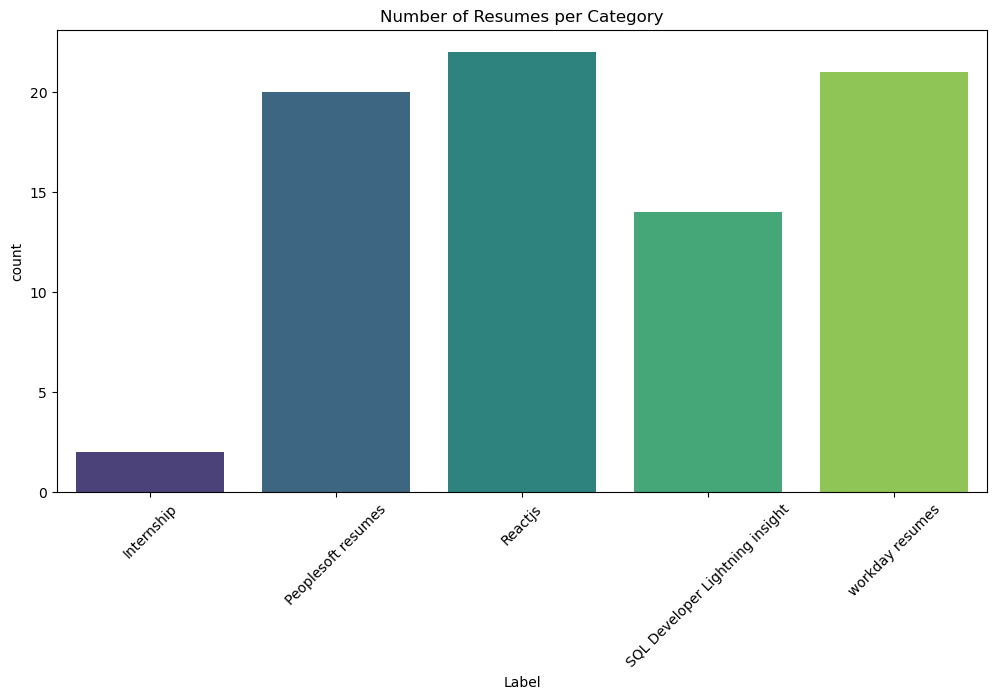

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(data=resume, x="Label", palette="viridis")
plt.title("Number of Resumes per Category")
plt.xticks(rotation=45)
plt.show()


# Histogram of Resume Text Length

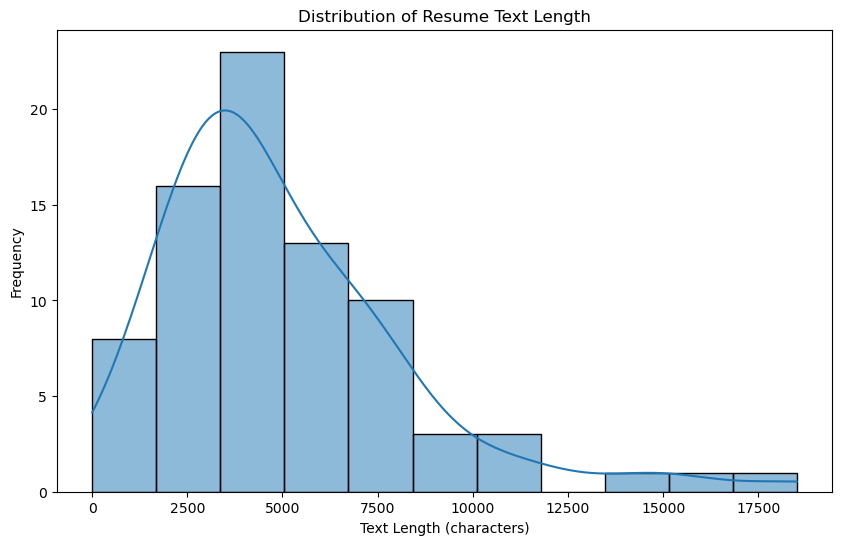

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(resume["Text_Length"], kde=True)
plt.title("Distribution of Resume Text Length")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()


# Histogram of Resume Word Count

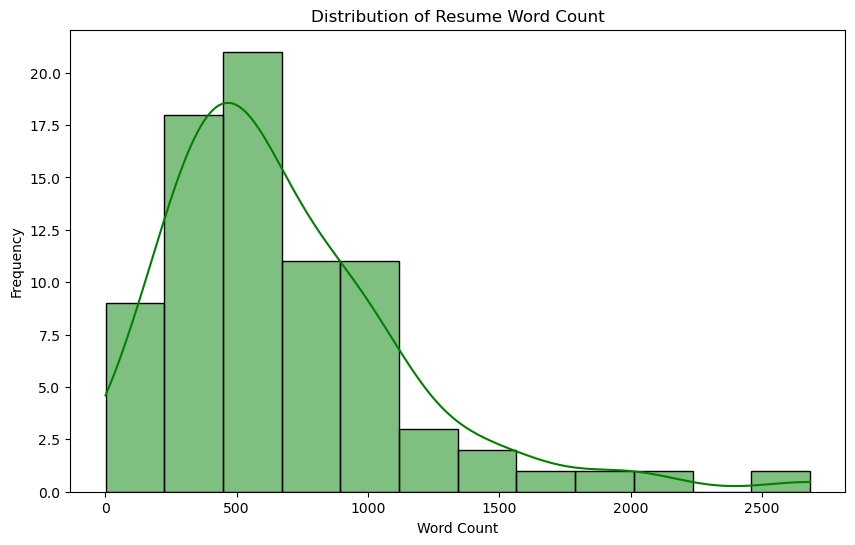

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(resume["Word_Count"], kde=True, color='green')
plt.title("Distribution of Resume Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


# Boxplot: Word Count per Category

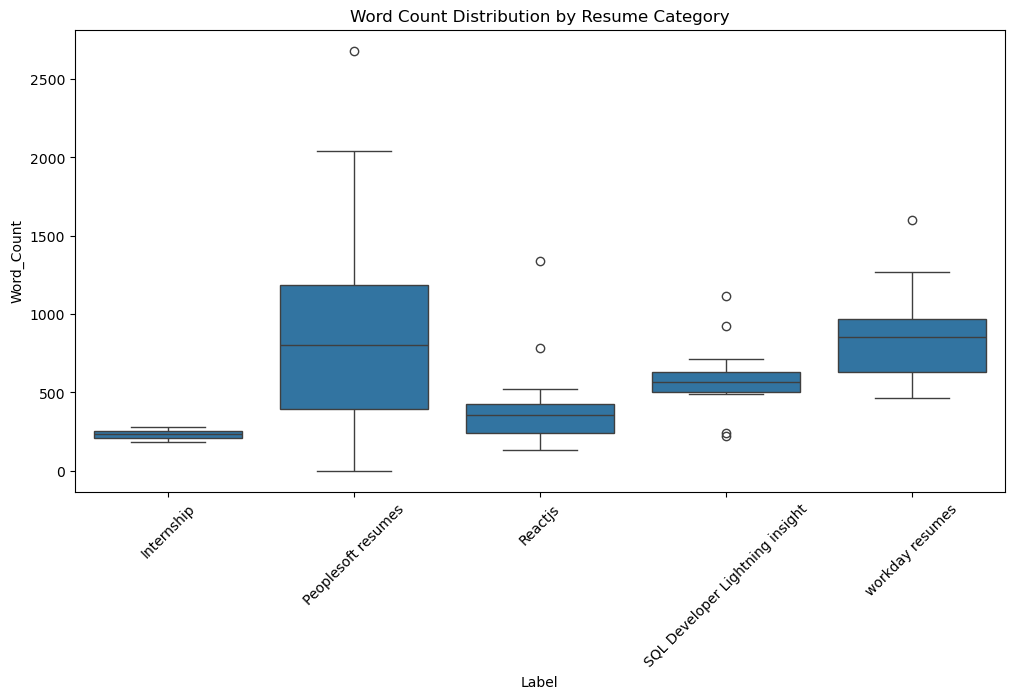

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(data=resume, x="Label", y="Word_Count")
plt.title("Word Count Distribution by Resume Category")
plt.xticks(rotation=45)
plt.show()


# Word Cloud for Entire Dataset

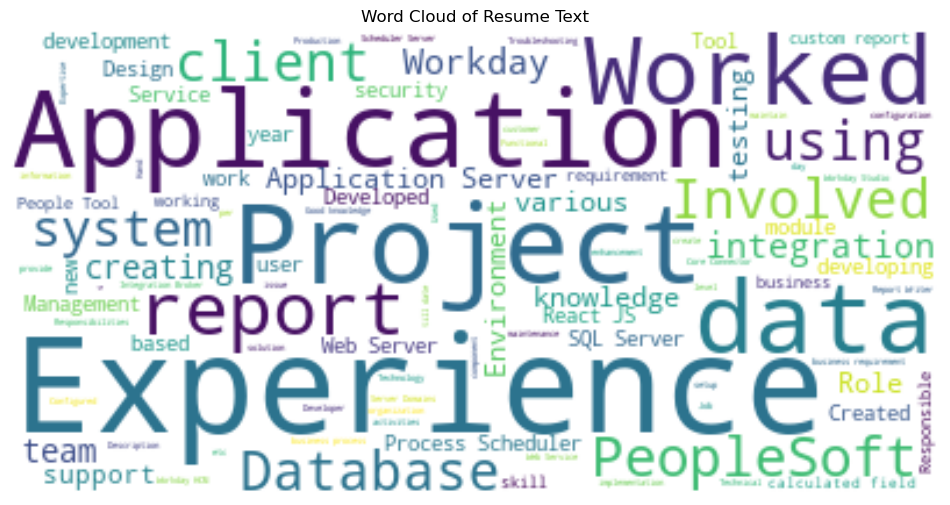

In [67]:
from wordcloud import WordCloud

text = " ".join(resume["Text"].astype(str))

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", max_words=200).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Resume Text")
plt.show()


# Wordcloud based on categories to compare skills

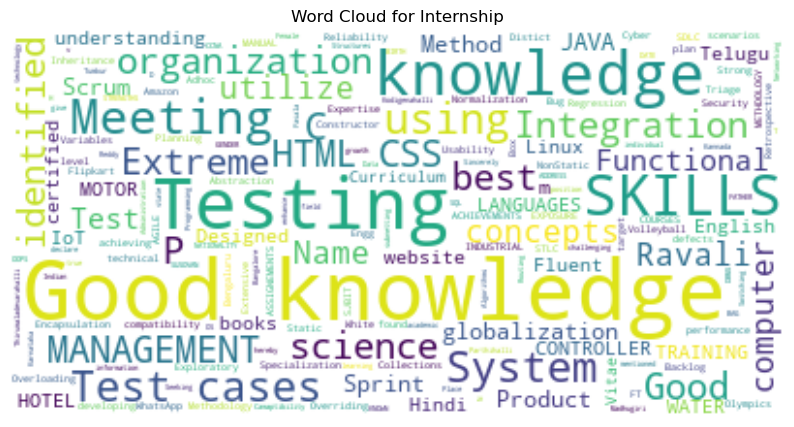

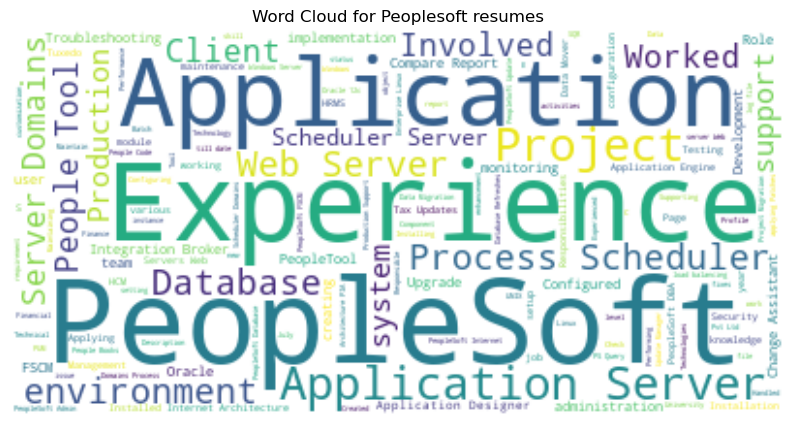

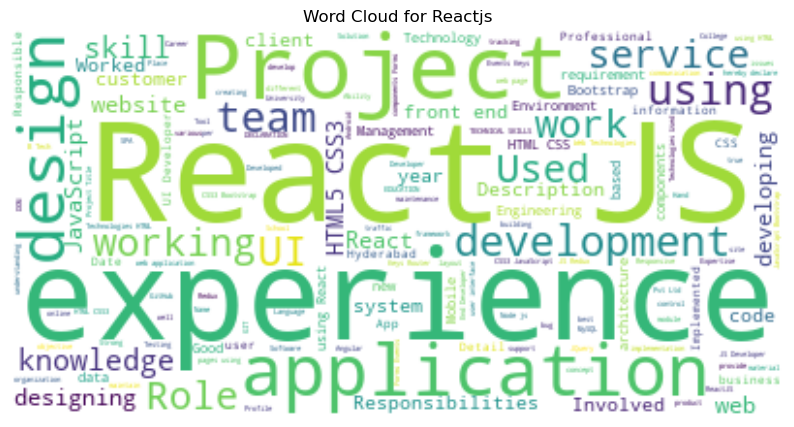

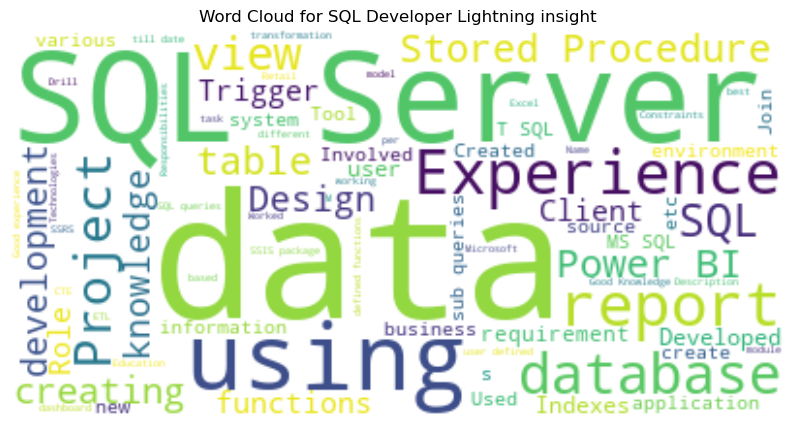

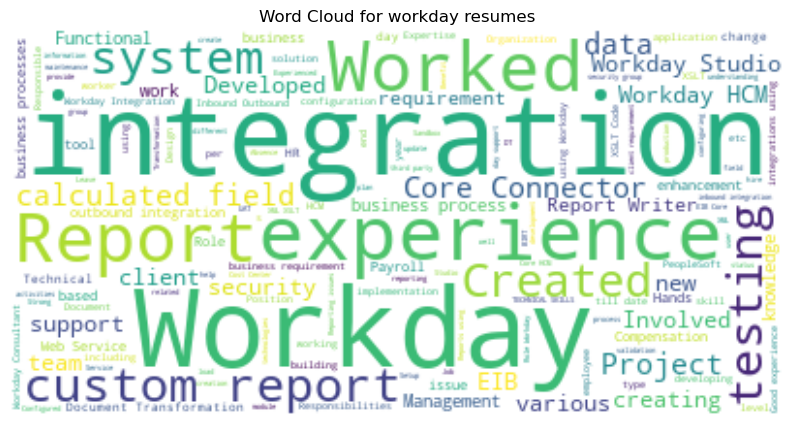

In [68]:
from wordcloud import WordCloud

for label in resume["Label"].unique():
    cat_text = " ".join(resume[resume["Label"] == label]["Text"].astype(str))
    wc = WordCloud(background_color="white", max_words=200).generate(cat_text)
    
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label}")
    plt.show()


# Correlation Heatmap for Numeric Features

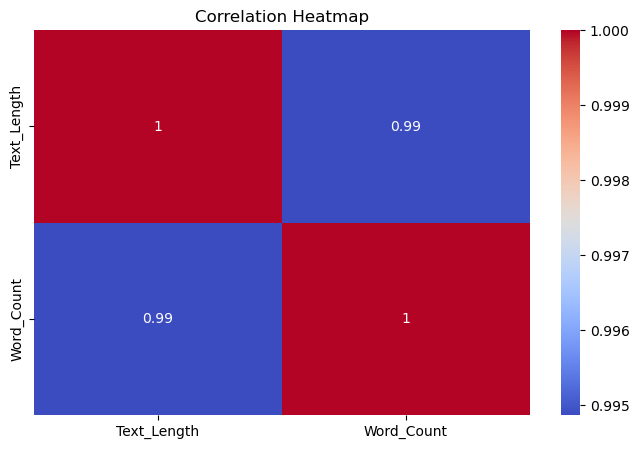

In [69]:
plt.figure(figsize=(8,5))
sns.heatmap(resume[["Text_Length","Word_Count"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load dataframe (adjust path if needed)
path = "Resume.csv"
if not Path(path).exists():
    raise FileNotFoundError(f"{path} not found. Put Resume.csv in the notebook folder or change the path.")
resume = pd.read_csv(path)

# choose text column
text_col = "Processed_Text" if "Processed_Text" in resume.columns else "Text"
resume[text_col] = resume[text_col].fillna("").astype(str)

# small helper
def get_texts():
    return resume[text_col].astype(str)


# Remove default English stopwords and special characters

In [71]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download("stopwords")

# 1) Default English stopwords
stop_words = set(stopwords.words("english"))

# 2) Add your custom stopwords
custom_stop = {"a", "to", "for", "and", "in", "i", "my"}

stop_words = stop_words.union(custom_stop)

# 3) Function to clean words: remove punctuation & symbols
def clean_words(text):
    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Lowercase + split
    words = text.lower().split()
    # Remove stopwords
    return [w for w in words if w not in stop_words and len(w) > 1]


[nltk_data] Downloading package stopwords to C:\Users\RAMCHANDRA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Top 20 words per category 

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1107376157.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l, y=words_l, palette="viridis")


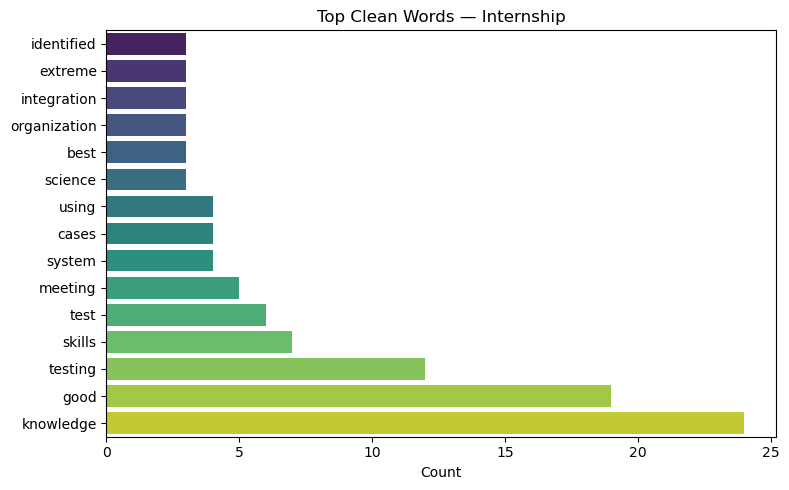

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1107376157.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l, y=words_l, palette="viridis")


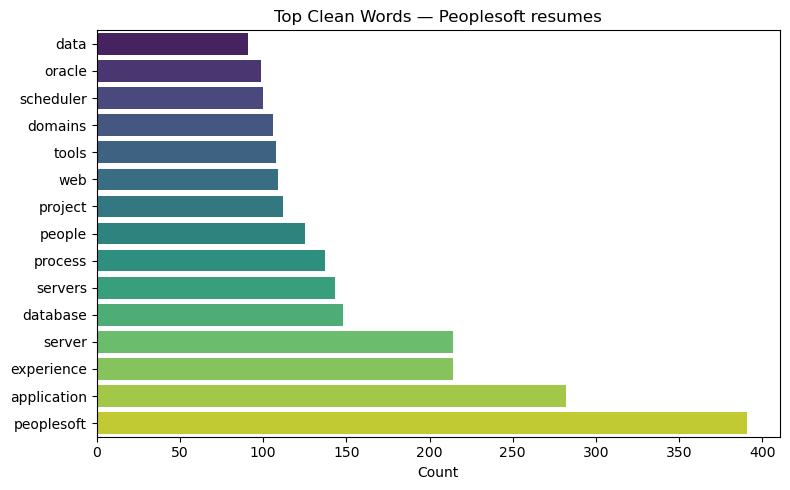

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1107376157.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l, y=words_l, palette="viridis")


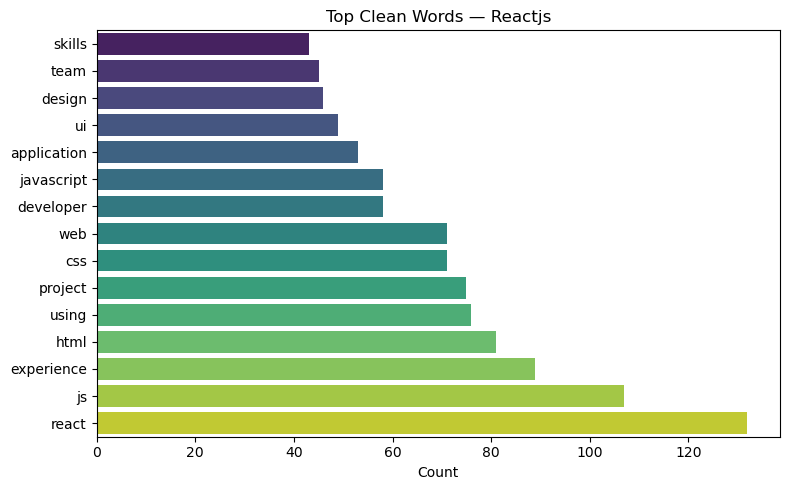

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1107376157.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l, y=words_l, palette="viridis")


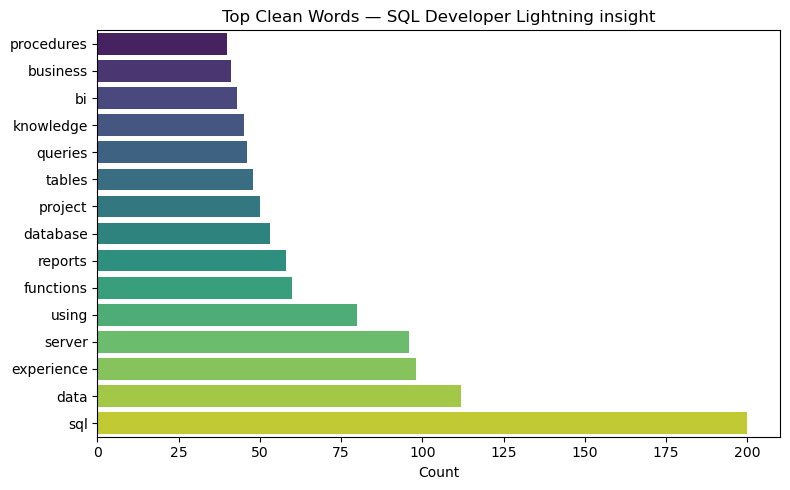

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1107376157.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_l, y=words_l, palette="viridis")


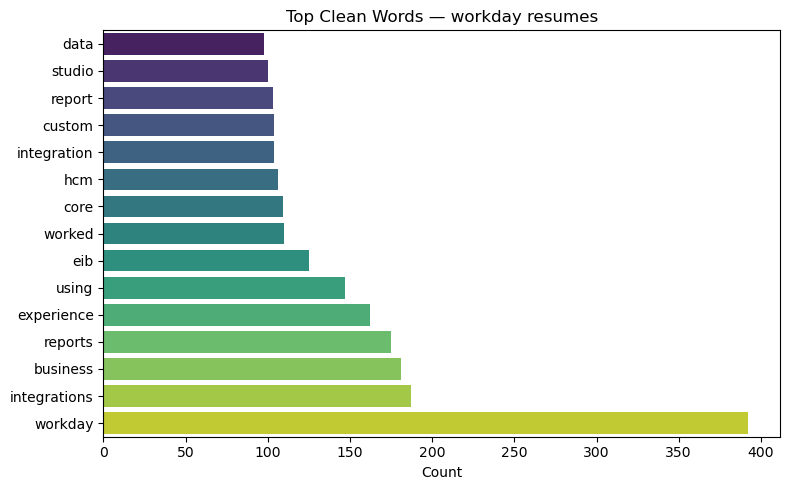

In [72]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

for label in resume["Label"].fillna("UNKNOWN").unique():
    
    docs = resume[resume["Label"] == label][text_col].astype(str)
    
    # Clean and filter words
    all_words = []
    for doc in docs:
        all_words.extend(clean_words(doc))
    
    most = Counter(all_words).most_common(15)
    
    if not most:
        print(f"Skipping {label} — no valid words.")
        continue
    
    words_l = [w for w,_ in most][::-1]   # reversed for barh
    counts_l = [c for _,c in most][::-1]
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=counts_l, y=words_l, palette="viridis")
    plt.title(f"Top Clean Words — {label}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()


# Bigram & Trigram analysis (top 20 )

Top 20 Bigrams:
experience in — 334
involved in — 170
of the — 137
worked on — 134
process scheduler — 103
sql server — 101
to the — 98
in the — 91
react js — 89
9 2 — 83
application server — 82
as per — 78
for the — 75
people tools — 72
as a — 68
knowledge on — 68
responsible for — 68
server domains — 68
custom reports — 67
experience on — 67


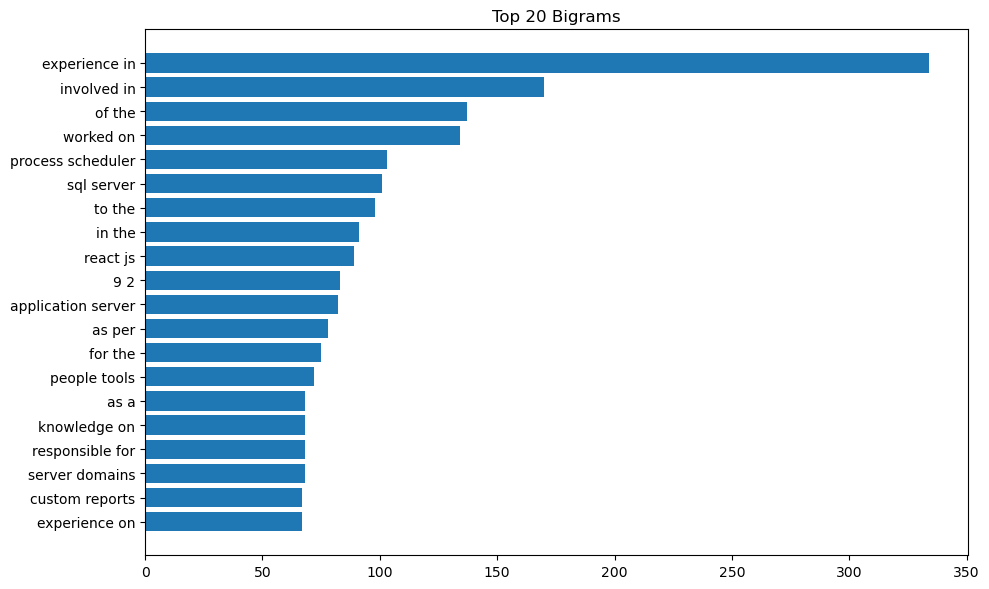


Top 20 Trigrams:
hands on experience — 52
on experience in — 44
years of experience — 42
of application server — 40
to till date — 39
application server domains — 36
day to day — 36
of experience in — 36
process scheduler servers — 36
and process scheduler — 34
as per the — 34
people tools 8 — 34
as well as — 30
experience in peoplesoft — 28
web server domains — 27
roles and responsibilities — 26
best of my — 25
fscm 9 2 — 25
good experience in — 25
hereby declare that — 25


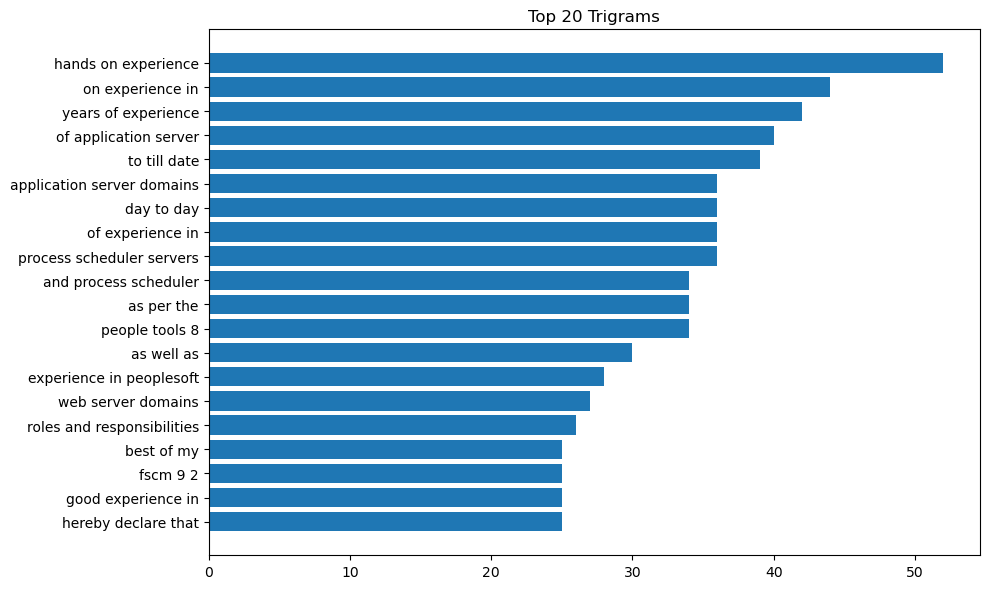

In [73]:
try:
    from sklearn.feature_extraction.text import CountVectorizer
except Exception:
    raise ImportError("Install scikit-learn: !pip install scikit-learn")

corpus = resume[text_col].astype(str).tolist()

def top_ngrams(corpus, ngram_range=(2,2), top_n=20):
    v = CountVectorizer(ngram_range=ngram_range, max_features=1000, token_pattern=r'(?u)\b\w+\b', stop_words=None)
    X = v.fit_transform(corpus)
    features = v.get_feature_names_out()
    counts = X.sum(axis=0).A1
    top = sorted(zip(features, counts), key=lambda x: x[1], reverse=True)[:top_n]
    return top

print("Top 20 Bigrams:")
bigrams = top_ngrams(corpus, (2,2), 20)
for b,c in bigrams[:20]:
    print(f"{b} — {c}")

# Plot top 20 bigrams
words = [w for w,_ in bigrams][::-1]
vals  = [v for _,v in bigrams][::-1]
plt.figure(figsize=(10,6)); plt.barh(words, vals); plt.title("Top 20 Bigrams"); plt.tight_layout(); plt.show()

print("\nTop 20 Trigrams:")
trigrams = top_ngrams(corpus, (3,3), 20)
for b,c in trigrams[:20]:
    print(f"{b} — {c}")

# Plot top 20 trigrams
words = [w for w,_ in trigrams][::-1]
vals  = [v for _,v in trigrams][::-1]
plt.figure(figsize=(10,6)); plt.barh(words, vals); plt.title("Top 20 Trigrams"); plt.tight_layout(); plt.show()


# Skill frequency charts (custom skill list)

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\1300335349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_sorted, y=skills_sorted, palette="coolwarm")


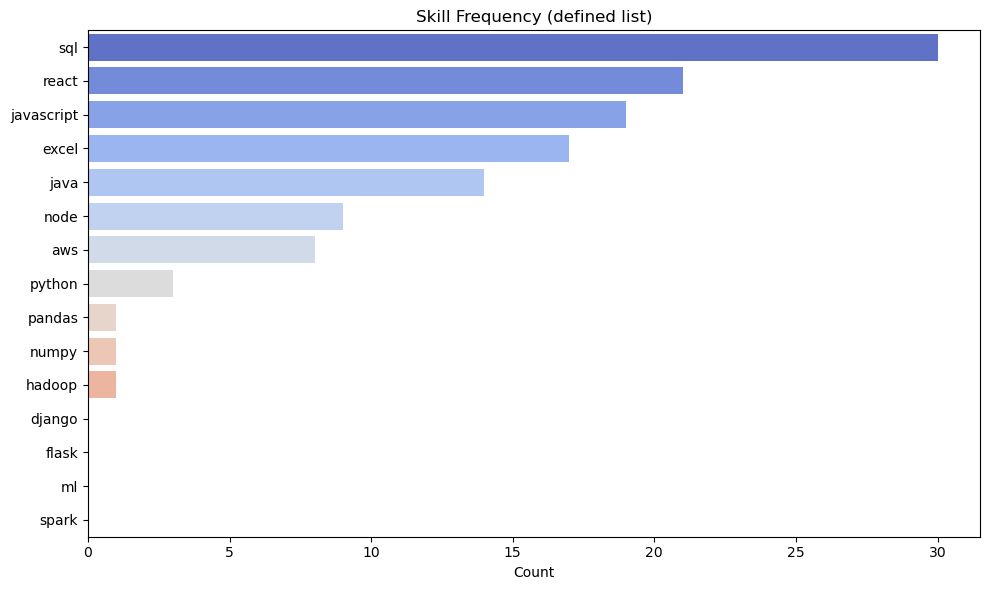

In [74]:
skills = ["python","sql","java","react","javascript","aws","excel","django","flask","node","pandas","numpy","ml","spark","hadoop"]
skill_counts = {s: resume[text_col].str.contains(fr'\b{s}\b', case=False, regex=True).sum() for s in skills}
items = sorted(skill_counts.items(), key=lambda x:x[1], reverse=True)
skills_sorted = [s for s,_ in items]
counts_sorted = [c for _,c in items]

plt.figure(figsize=(10,6))
sns.barplot(x=counts_sorted, y=skills_sorted, palette="coolwarm")
plt.title("Skill Frequency (defined list)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


# TF-IDF keyword extraction (top 15 per category)

[nltk_data] Downloading package stopwords to C:\Users\RAMCHANDRA
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\2102863077.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=words, palette="viridis")


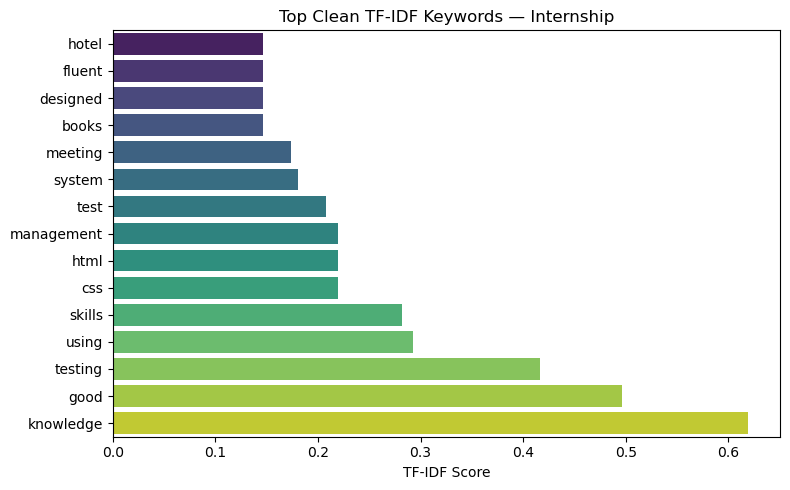

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\2102863077.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=words, palette="viridis")


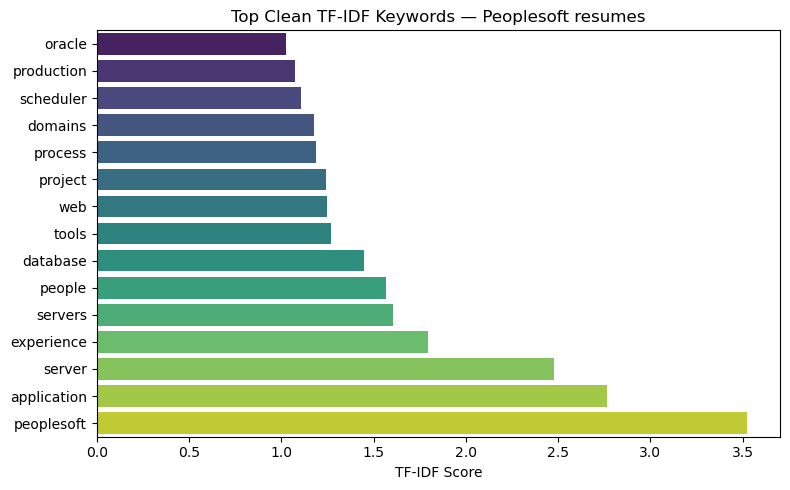

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\2102863077.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=words, palette="viridis")


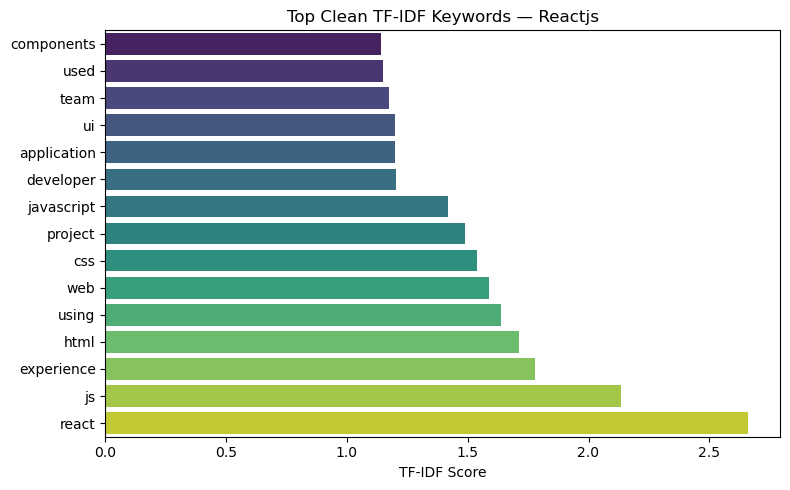

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\2102863077.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=words, palette="viridis")


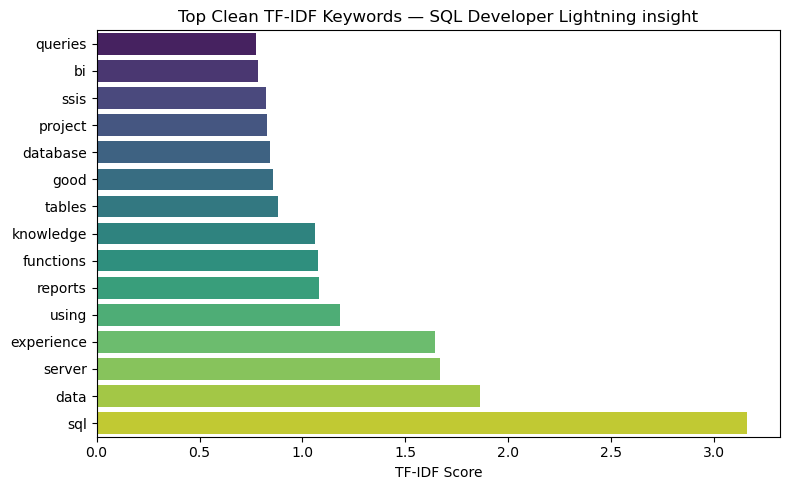

C:\Users\RAMCHANDRA REDDY\AppData\Local\Temp\ipykernel_21268\2102863077.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=words, palette="viridis")


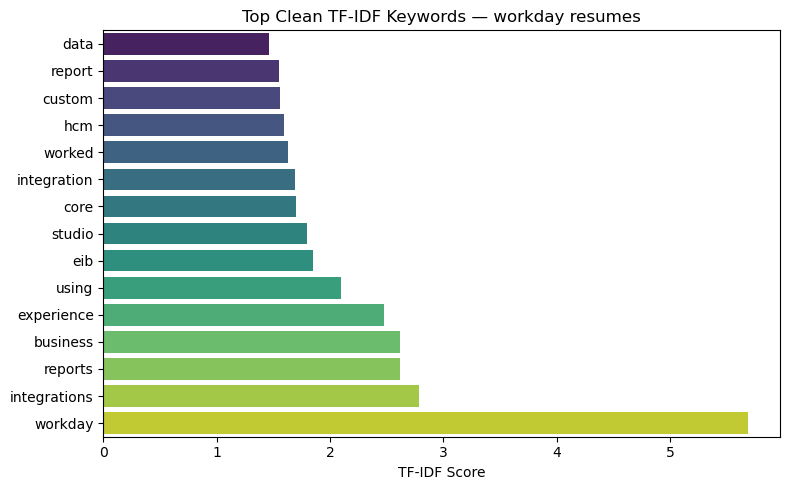

In [75]:
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

nltk.download("stopwords")

# 1) Stopwords: English + your custom words
stop_words = set(stopwords.words("english"))
custom_stop = {"a","an","the","is","was","were","in","on","and","or","i","my","for","to","of","with","as"}
stop_words = stop_words.union(custom_stop)

# 2) Function to clean text before TF-IDF
def clean_tf_text(text):
    # remove numbers
    text = re.sub(r"\d+", " ", text)

    # remove punctuation/symbols
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # lowercase
    text = text.lower()

    # tokenize
    words = text.split()

    # remove stopwords
    words = [w for w in words if w not in stop_words and len(w) > 1]

    return " ".join(words)



# 3) Apply cleaning for TF-IDF (new column)
text_col = "Processed_Text" if "Processed_Text" in resume.columns else "Text"
resume["TF_Clean"] = resume[text_col].astype(str).apply(clean_tf_text)

# 4) TF-IDF per category (cleaned)
labels = resume["Label"].fillna("UNKNOWN").unique()

for label in labels:
    docs = resume[resume["Label"] == label]["TF_Clean"].tolist()
    docs = [d for d in docs if d.strip()]

    if len(docs) == 0:
        print(f"Skipping {label} — no text.")
        continue

    vect = TfidfVectorizer(
        max_features=1000,
        token_pattern=r'(?u)\b[a-zA-Z]{2,}\b',   # only alphabetic words of length ≥2
        lowercase=True,
        min_df=1,
        stop_words=None
    )

    X = vect.fit_transform(docs)
    feat = vect.get_feature_names_out()
    scores = X.sum(axis=0).A1

    # top 15 TF-IDF features
    top = sorted(zip(feat, scores), key=lambda x: x[1], reverse=True)[:15]

    words = [w for w,_ in top][::-1]
    vals  = [v for _,v in top][::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(x=vals, y=words, palette="viridis")
    plt.title(f"Top Clean TF-IDF Keywords — {label}")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.show()


In [102]:
import os, zipfile, shutil, warnings
warnings.filterwarnings('ignore')

ZIP_PATH = "Data set.zip"  
EXTRACT_DIR = "unzipped_files"
OUT_META = "Extracted_resumes.csv"

# extract
if os.path.exists(EXTRACT_DIR):
    shutil.rmtree(EXTRACT_DIR)
os.makedirs(EXTRACT_DIR, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_DIR)

# parse docx
from docx import Document
import pandas as pd
rows = []
react_kws = ['react','reactjs','react.js','react native','react-native','redux','jsx']

for root, _, files in os.walk(EXTRACT_DIR):
    for fname in files:
        if fname.lower().endswith(".docx"):
            fp = os.path.join(root, fname)
            try:
                doc = Document(fp)
                paras = [p.text for p in doc.paragraphs if p.text and p.text.strip()]
                text = "\n".join(paras)
            except Exception:
                text = ""
            rel = os.path.relpath(fp, EXTRACT_DIR)
            parts = rel.split(os.sep)
            orig_label = parts[-2] if len(parts) >= 2 else "unknown"
            label = orig_label.strip()
            combined = (orig_label + " " + text).lower()
            if any(kw in combined for kw in react_kws):
                label = "Reactjs"
            rows.append({"filepath": fp, "relpath": rel, "orig_label": orig_label, "label": label, "text": text})

meta = pd.DataFrame(rows)
meta = meta[meta['text'].astype(str).str.strip() != ""].reset_index(drop=True)
meta.to_csv(OUT_META, index=False)

print("Parsed rows:", len(meta))
print(meta['label'].value_counts())
display(meta.head())


Parsed rows: 52
label
Reactjs                            18
SQL Developer Lightning insight    11
workday resumes                    11
Peoplesoft resumes                 10
Internship                          2
Name: count, dtype: int64


,filepath,relpath,orig_label,label,text
0,unzipped_files\Data set\Resumes\Internship\Int...,Data set\Resumes\Internship\Internship_Ravali_...,Internship,Internship,Name: Ravali P \n ...
1,unzipped_files\Data set\Resumes\Internship\Int...,Data set\Resumes\Internship\Internship_Susovan...,Internship,Internship,SUSOVAN BAG \nSeeking a challenging posi...
2,unzipped_files\Data set\Resumes\Peoplesoft res...,Data set\Resumes\Peoplesoft resumes\Peoplesoft...,Peoplesoft resumes,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n To work in a glob...
3,unzipped_files\Data set\Resumes\Peoplesoft res...,Data set\Resumes\Peoplesoft resumes\Peoplesoft...,Peoplesoft resumes,Peoplesoft resumes,Murali\nExperience Summary \nI have 6 years of...
4,unzipped_files\Data set\Resumes\Peoplesoft res...,Data set\Resumes\Peoplesoft resumes\Peoplesoft...,Peoplesoft resumes,Peoplesoft resumes,PROFILE SUMMARY\nI have overall 6.8 years’ exp...


# Model Building

In [9]:
# clean_model_build.py
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
from IPython.display import display


META = "Extracted_resumes.csv"
TEST_EVAL_OUT = "model_test_eval.csv"
PREPROCESSOR_OUT = "preprocessor.pkl"
BEST_PIPE_OUT = "best_pipeline.pkl"
TEST_SIZE = 0.20
RANDOM_STATE = 42
TFIDF_MAX_FEAT = 15000
TFIDF_NGRAM = (1, 2)
TFIDF_STOP = "english"
CALIBRATE_CV = 3


# Load dataset
meta = pd.read_csv(META)

if "text" not in meta.columns and "Text" in meta.columns:
    meta["text"] = meta["Text"]

meta["text"] = meta["text"].fillna("").astype(str)

if "label" not in meta.columns and "Label" in meta.columns:
    meta["label"] = meta["Label"]

meta["label"] = meta["label"].astype(str)

X = meta["text"]
y = meta["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# TF-IDF
tfidf = TfidfVectorizer(
    max_features=TFIDF_MAX_FEAT, ngram_range=TFIDF_NGRAM, stop_words=TFIDF_STOP
)

Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

# Save preprocessor
pickle.dump(tfidf, open(PREPROCESSOR_OUT, "wb"))

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "logistic": LogisticRegression(max_iter=2000, random_state=RANDOM_STATE),
    "naive_bayes": MultinomialNB(),
    "svm": SVC(kernel="linear", probability=True, random_state=RANDOM_STATE),
    "random_forest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE),
    "gradient_boost": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "knn": KNeighborsClassifier(),
    "adaboost": AdaBoostClassifier(random_state=RANDOM_STATE)
}

# Helper for probability
def get_proba(clf, Xtr_local, ytr_local, Xte_local):
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(Xte_local)
    try:
        base = clone(clf)
        calib = CalibratedClassifierCV(base, cv=CALIBRATE_CV)
        calib.fit(Xtr_local, ytr_local)
        return calib.predict_proba(Xte_local)
    except:
        return None

# Evaluation
classes_sorted = sorted(meta["label"].unique())
y_test_bin = (y_test.to_numpy()[:, None] == np.array(classes_sorted)[None, :]).astype(int)

eval_rows = []
fitted = {}

for name, clf in models.items():
    clf.fit(Xtr, y_train)
    y_pred = clf.predict(Xte)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro")

    # roc
    roc = np.nan
    proba = get_proba(clf, Xtr, y_train, Xte)
    if proba is not None:
        try:
            from sklearn.preprocessing import label_binarize
            ybin = label_binarize(y_test, classes=classes_sorted)

            # reorder prob columns if needed
            if hasattr(clf, "classes_"):
                order = [list(clf.classes_).index(c) for c in classes_sorted]
                proba = proba[:, order]

            roc = roc_auc_score(ybin, proba, average="macro")
        except:
            roc = np.nan

    eval_rows.append({
        "model": name,
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1,
        "roc_auc_macro": roc
    })

    fitted[name] = clf

# Build eval_df
eval_df = pd.DataFrame(eval_rows).sort_values("f1_macro", ascending=False).reset_index(drop=True)

# Print dataframe 
print("\n EVALUATION ")
display(eval_df)

# Save evaluation CSV
eval_df.to_csv(TEST_EVAL_OUT, index=False)

# Save best model
best_name = eval_df.loc[0, "model"]
best_clf = fitted[best_name]
best_pipeline = Pipeline([("tfidf", tfidf), ("clf", best_clf)])
pickle.dump(best_pipeline, open(BEST_PIPE_OUT, "wb"))

print(f"\nBest model: {best_name}")
print(f"Saved: {BEST_PIPE_OUT}")


C:\Users\RAMCHANDRA REDDY\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 EVALUATION 


,model,accuracy,precision_macro,recall_macro,f1_macro,roc_auc_macro
0,logistic,0.909091,0.760000,0.8,0.777778,0.980000
1,svm,0.909091,0.760000,0.8,0.777778,0.800000
2,gradient_boost,0.909091,0.760000,0.8,0.777778,1.000000
3,knn,0.909091,0.760000,0.8,0.777778,0.885714
4,adaboost,0.909091,0.760000,0.8,0.777778,0.992857
5,naive_bayes,0.818182,0.733333,0.7,0.693333,1.000000
6,random_forest,0.818182,0.733333,0.7,0.693333,0.972857



Best model: logistic
Saved: best_pipeline.pkl


#  ROC CURVE

In [15]:
#  ROC CURVE COMPARISON 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone

def get_proba(clf, Xtr, ytr, Xte):
    """Return probability matrix; calibrate if predict_proba not available."""
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(Xte)
    try:
        calib = CalibratedClassifierCV(clone(clf), cv=3)
        calib.fit(Xtr, ytr)
        return calib.predict_proba(Xte)
    except:
        return None

def plot_model_comparison_roc(models, Xtr, y_train, Xte, y_test, classes):
    """
    models: dict {"name": classifier}
    Xtr, y_train: training vectors and labels
    Xte, y_test: test vectors and labels
    classes: sorted list of classes
    """
    
    # binarize labels for multiclass ROC
    y_test_bin = label_binarize(y_test, classes=classes)

    plt.figure(figsize=(9, 7))
    plt.plot([0,1], [0,1], "--", color="gray")

    for name, clf in models.items():
        # fit model
        clf.fit(Xtr, y_train)

        # get probabilities
        proba = get_proba(clf, Xtr, y_train, Xte)
        if proba is None:
            print(f"Skipping ROC for {name} (no probability output).")
            continue

        # reorder probability columns to classes
        if hasattr(clf, "classes_"):
            clf_classes = list(clf.classes_)
            try:
                order = [clf_classes.index(c) for c in classes]
                proba = proba[:, order]
            except:
                pass

        # compute micro-average ROC (one curve per model)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
        roc_auc_micro = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc_micro:.3f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison — Micro Average")
    plt.legend(loc="lower right", fontsize="small")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


C:\Users\RAMCHANDRA REDDY\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


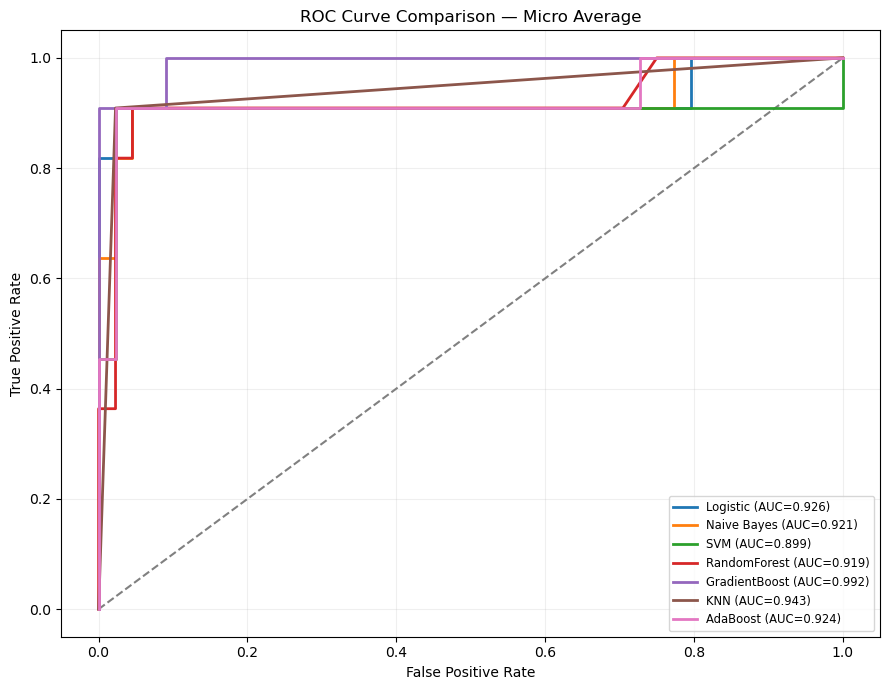

In [21]:
models_to_compare = {
    "Logistic": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear", probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}
classes_sorted = sorted(y_train.unique())

plot_model_comparison_roc(
    models_to_compare,
    Xtr, y_train,
    Xte, y_test,
    classes_sorted
)


# FEATURE IMPORTANCE

In [17]:
# FEATURE IMPORTANCE 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def plot_feature_importance(best_clf, tfidf, X_test_vec, y_test, top_n=25):
    """Plot feature importance for tree, logistic, or fallback to permutation."""
    feature_names = tfidf.get_feature_names_out()
    importances = None
    method = None

    # 1 — Tree-based models
    if hasattr(best_clf, "feature_importances_"):
        importances = best_clf.feature_importances_
        method = "feature_importances_"

    # 2 — Linear models (Logistic Regression)
    elif hasattr(best_clf, "coef_"):
        coef = best_clf.coef_
        if coef.ndim == 1:
            importances = np.abs(coef)
        else:
            importances = np.mean(np.abs(coef), axis=0)  # multiclass summary
        method = "coef_"

    # 3 — Fallback: Permutation Importance
    else:
        print("Using permutation importance (slower)...")
        r = permutation_importance(best_clf, X_test_vec, y_test, n_repeats=10, random_state=42)
        importances = r.importances_mean
        method = "permutation"

    # Select top features
    idx = np.argsort(importances)[::-1][:top_n]
    labels = feature_names[idx][::-1]   # reverse for horizontal barh
    values = importances[idx][::-1]

    # Plot
    plt.figure(figsize=(8, 0.35*top_n + 4))
    plt.barh(range(top_n), values, edgecolor="black")
    plt.yticks(range(top_n), labels)
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Feature Importances ({method})")
    plt.tight_layout()
    plt.show()

    # Print top features
    print("\nTop Features:")
    for i in range(top_n):
        print(f"{labels[i]}  ->  {values[i]:.5f}")




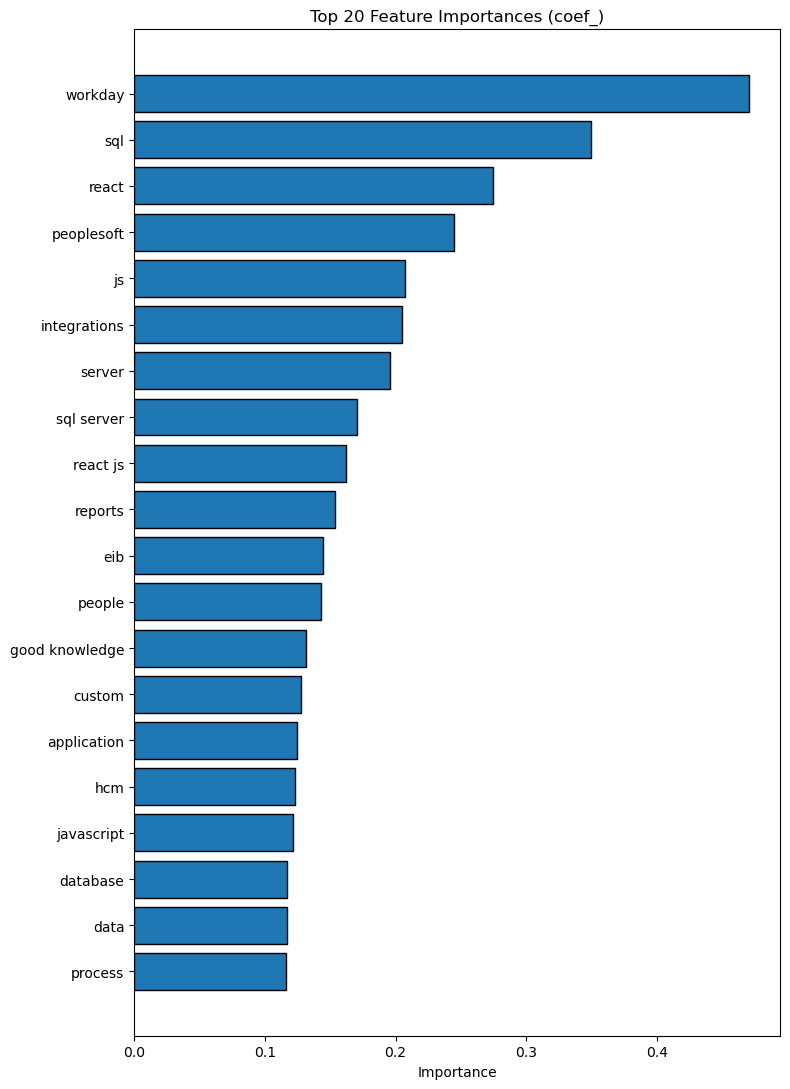


Top Features:
process  ->  0.11591
data  ->  0.11697
database  ->  0.11702
javascript  ->  0.12126
hcm  ->  0.12275
application  ->  0.12461
custom  ->  0.12759
good knowledge  ->  0.13113
people  ->  0.14260
eib  ->  0.14449
reports  ->  0.15387
react js  ->  0.16221
sql server  ->  0.17057
server  ->  0.19559
integrations  ->  0.20472
js  ->  0.20717
peoplesoft  ->  0.24501
react  ->  0.27486
sql  ->  0.34976
workday  ->  0.47063


In [19]:
plot_feature_importance(best_clf, tfidf, Xte, y_test, top_n=20)

# DEPLOYMENT

In [9]:
%%writefile app.py
import streamlit as st
import pickle
import re
import io
import pandas as pd

# optional parsers
try:
    import docx
except:
    docx = None

try:
    import pdfplumber
except:
    pdfplumber = None

# CONFIG 
MODEL_PATH = "best_pipeline.pkl"   
ALLOWED_TYPES = ["pdf", "docx", "txt"]

# If filename indicates internship, we force this label:
OVERRIDE_LABEL_FOR_INTERNS = "Internship"

# Keywords checked in filename (case-insensitive)
FNAME_INTERN_KEYS = ["intern", "internship", "trainee"]


st.set_page_config(page_title="Resume Classification", layout="wide")
st.title("Resume Predictor — Upload Resume")
st.write("Upload resumes (PDF / DOCX / TXT). App shows Name and Predicted Label.")


# Load trained model (NO DISPLAY MESSAGE)
@st.cache_data(show_spinner=False)
def load_pipeline(path):
    try:
        with open(path, "rb") as f:
            return pickle.load(f), None
    except Exception as e:
        return None, str(e)

pipeline, load_err = load_pipeline(MODEL_PATH)



# Text extraction 
def extract_text_from_docx_bytes(b):
    if docx is None:
        return ""
    try:
        doc = docx.Document(io.BytesIO(b))
        return "\n".join([p.text for p in doc.paragraphs if p.text])
    except:
        return ""

def extract_text_from_pdf_bytes(b):
    if pdfplumber is None:
        return ""
    try:
        text_list = []
        with pdfplumber.open(io.BytesIO(b)) as pdf:
            for page in pdf.pages:
                text_list.append(page.extract_text() or "")
        return "\n".join(text_list)
    except:
        return ""

def extract_text_from_txt_bytes(b):
    try:
        return b.decode("utf-8", errors="ignore")
    except:
        return str(b)

def extract_text(file):
    fname = file.name.lower()
    b = file.read()
    if fname.endswith(".pdf"):
        return extract_text_from_pdf_bytes(b)
    if fname.endswith(".docx"):
        return extract_text_from_docx_bytes(b)
    return extract_text_from_txt_bytes(b)


# Name extractor
def extract_name(text):
    if not text:
        return "Not Found"

    # pattern: Name: John Doe
    m = re.search(r"(?i)\bname[:\-\s]{1,6}([A-Z][A-Za-z ,.'\-]{1,80})", text)
    if m:
        return m.group(1).strip()

    # first plausible line
    for ln in text.splitlines()[:12]:
        s = ln.strip()
        if not s or len(s) > 80:
            continue
        parts = s.split()
        if 2 <= len(parts) <= 4 and not any(ch.isdigit() for ch in s):
            if re.search(r"(?i)\b(resume|curriculum|cv|objective|summary|profile)\b", s):
                continue
            return s

    return "Not Found"


# Filename-based internship 
def filename_indicates_internship(filename: str) -> bool:
    low = filename.lower()
    return any(kw in low for kw in FNAME_INTERN_KEYS)


# File Upload 
uploaded_files = st.file_uploader(
    "Upload resumes (PDF / DOCX / TXT) — multiple allowed",
    accept_multiple_files=True,
    type=ALLOWED_TYPES
)

if uploaded_files:
    rows = []
    texts = []

    for file in uploaded_files:
        txt = extract_text(file)
        nm = extract_name(txt)
        is_intern = filename_indicates_internship(file.name)

        rows.append({
            "filename": file.name,
            "name": nm,
            "is_intern": is_intern,
            "text": txt
        })

        texts.append(txt)

    # Predictions using model
    if pipeline is None:
        st.error("Model not loaded. Please place best_pipeline.pkl in app folder.")
        st.stop()

    try:
        raw_preds = pipeline.predict(texts)
    except Exception as e:
        st.error(f"Prediction failed: {e}")
        st.stop()

    # Apply filename-based internship override
    final_labels = []
    for r, raw_label in zip(rows, raw_preds):
        if r["is_intern"]:
            final_labels.append(OVERRIDE_LABEL_FOR_INTERNS)
        else:
            final_labels.append(raw_label)

    # DataFrame 
    df = pd.DataFrame({
        "filename": [r["filename"] for r in rows],
        "name": [r["name"] for r in rows],
        "predicted_label": final_labels
    })

    # Show dataframe only
    st.markdown("### Results — Uploaded Resume Predictions")
    st.dataframe(df, use_container_width=True)

    # Allow CSV download
    csv = df.to_csv(index=False).encode("utf-8")
    st.download_button(
        "Download predictions (CSV)",
        data=csv,
        file_name="resume_predictions.csv",
        mime="text/csv"
    )

else:
    st.info("Upload resumes to begin.")


Overwriting app.py
